In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
from itertools import cycle
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scienceplots


In [2]:
fitted_data = pd.read_csv('fit_details.csv',encoding="utf-8")
fitted_data

,Fuente(experimento),Texp0,Texp1,Texp2,Texp3,Texp4,Texp5,Texp6,Texp7,Texp8,...,MSE,best_error,e_ads,e_int_abs,e_des,e_int_des,e_diff,e_int_diff,lattice_size,T
0,Adsorcion de As+5 (60ppmSb-As),0,7.356582,12.689700,16.639759,18.501776,20.487569,23.818749,27.994834,30.050587,...,0.180722,0.102170,0.081506,0.042231,0.272000,0.068302,0.160000,0.160000,765,300.652977
1,Adsorcion de As+5 (60ppmAs-As),0,20.779935,25.251636,27.748749,29.965348,32.368957,36.389638,43.149442,48.682691,...,2.453615,1.915544,0.040199,0.042529,0.272000,0.068000,0.640000,0.108811,600,300.000000
2,Adsorcion de As+5 (90ppmAs-As),0,17.067494,22.581181,27.208246,29.441427,31.863017,35.913776,42.724149,48.187964,...,0.792748,0.661106,0.047140,0.038715,0.243444,0.267271,0.586739,0.150995,737,300.008465
3,Adsorcion de Pb (beta - FeOOH 0.05 M-Pb),0,1.145313,1.696100,2.264219,3.106472,3.699600,4.016499,4.056284,4.106165,...,0.135049,0.037399,0.115559,0.077452,0.099043,0.166115,0.160000,0.118336,783,300.000000
4,Adsorcion de Sb (beta - FeOOH 0.05 M-Sb),0,6.008902,10.187933,12.134026,13.930267,15.141939,16.922354,20.326410,23.376360,...,0.123435,0.109109,0.087042,0.051374,0.147142,0.149227,0.593463,0.085338,658,300.623917
5,Adsorcion de Sb (60ppmSb-Sb),0,27.241766,41.585839,46.084479,48.311079,49.992389,52.567519,55.551390,57.868871,...,3.111281,3.198456,0.034788,0.035238,0.250392,-0.027200,NaN,NaN,600,300.525227
6,Adsorcion de Sb (60ppmAs-Sb),0,34.587323,41.906065,44.300046,46.055632,46.967624,48.723210,51.983584,54.331965,...,1.153845,39.797460,0.001187,0.081499,0.234875,-0.015344,0.211515,-0.039092,315,300.025359
7,Adsorcion de Sb (60ppmHg-Sb),0,29.154068,36.910247,42.092633,43.724502,44.948404,50.227982,62.491001,64.050876,...,6.121742,5.697875,0.039200,0.032803,0.272000,0.148845,0.206789,0.160000,600,300.198780
8,Adsorcion de Sb (120ppmAs-Sb),0,21.817095,29.432051,34.577737,37.286592,39.562941,43.523788,51.331664,56.111996,...,1.028285,0.843838,0.039200,0.035252,0.272000,0.272000,0.640000,0.068713,727,300.644217
9,Adsorcion de Sb (120ppmSb-Sb),0,12.184766,16.710792,20.125645,22.100067,23.401391,26.923940,33.789545,37.715952,...,0.945446,0.596735,0.080085,0.040421,0.272000,0.111082,0.187424,0.160000,600,300.358782


In [3]:
fitted_data.columns

Index(['Fuente(experimento)', 'Texp0', 'Texp1', 'Texp2', 'Texp3', 'Texp4',
       'Texp5', 'Texp6 ', 'Texp7 ', 'Texp8', 'mean_t0', 'mean_t1', 'mean_t3',
       'mean_t6', 'mean_t9', 'mean_t12', 'mean_t20', 'mean_t40', 'mean_t60',
       'std_t0', 'std_t1', 'std_t3', 'std_t6', 'std_t9', 'std_t12', 'std_t20',
       'std_t40', 'std_t60', 'MSE', 'best_error', 'e_ads', 'e_int_abs',
       'e_des', 'e_int_des', 'e_diff', 'e_int_diff', 'lattice_size', 'T'],
      dtype='object')

In [4]:
plt.style.use(['science', 'ieee'])
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman']
mpl.rcParams['font.size'] = 13
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'svg.fonttype': 'none'
})

# Limpiar nombres de columnas
fitted_data.columns = fitted_data.columns.str.strip()

# Definir columnas
time_points = np.array([0, 1, 3, 6, 9, 12, 20, 40, 60])
exp_cols = [f"Texp{i}" for i in range(9)]
fit_mean_cols = [f"mean_t{i}" for i in time_points]

# Carpeta de salida
output_dir = "figuras_kmc"
os.makedirs(output_dir, exist_ok=True)

# Paleta de colores más sofisticada
custom_palette = (
    list(plt.get_cmap("Dark2").colors) +
    list(plt.get_cmap("Set2").colors) +
    list(plt.get_cmap("Paired").colors)
)
color_cycle = cycle(custom_palette)

# Función principal
def plot_kmc_curves(experiments):
    fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

    experiment_handles = []

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente_raw = row["Fuente(experimento)"]
        fuente = fuente_raw.replace("beta", r"$\beta$")

        y_exp = row[exp_cols].values.astype(float)
        y_fit_mean = row[fit_mean_cols].values.astype(float)

        color = next(color_cycle)
        faded_color = to_rgba(color, alpha=0.35)

        # Gráfica
        ax.scatter(time_points, y_exp, marker='s', s=30, color=faded_color)
        ax.plot(time_points, y_fit_mean, marker='o', lw=1.2, markersize=4, linestyle='--', color=color)

        # Handle para leyenda del experimento
        handle = Line2D([0], [0], color=color, marker='o', linestyle='--', label=fuente)
        experiment_handles.append(handle)

    # Leyenda simbólica (separada)
    symbol_handles = [
        Line2D([0], [0], color='gray', marker='s', linestyle='None', label='Datos experimentales'),
        Line2D([0], [0], color='gray', marker='o', linestyle='--', label='Ajuste kMC')
    ]

    # Mostrar leyendas separadas
    legend1 = ax.legend(handles=symbol_handles, loc='upper left', frameon=False, fontsize=12, title="Símbolos", title_fontsize=12)
    legend2 = ax.legend(handles=experiment_handles, loc='lower right', frameon=False, fontsize=12, title="Experimentos", title_fontsize=12)
    ax.add_artist(legend1)  # Agrega la primera leyenda manualmente para que no se sobrescriba

    # Ejes y título
    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("$Q_t$ (%)")
    ax.grid(True)
    plt.tight_layout()

    # Guardar figura
    fig.savefig(os.path.join(output_dir, f"Ajuste_{experiments}.pdf"), bbox_inches='tight')
    plt.close(fig)

    print(f"Figura guardada en: {os.path.join(output_dir, f'Ajuste_{experiments}.pdf')}")

def visualizar_kmc_curvas(experiments, fitted_data, time_points):
    exp_cols = [f"Texp{i}" for i in range(len(time_points))]
    fit_mean_cols = [f"mean_t{i}" for i in time_points]

    fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

    experiment_handles = []

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente_raw = row["Fuente(experimento)"]
        fuente = fuente_raw.replace("beta", r"$\beta$")

        y_exp = row[exp_cols].values.astype(float)
        y_fit_mean = row[fit_mean_cols].values.astype(float)

        color = next(color_cycle)
        faded_color = to_rgba(color, alpha=0.35)

        ax.scatter(time_points, y_exp, marker='s', s=30, color=faded_color)
        ax.plot(time_points, y_fit_mean, marker='o', lw=1.2, markersize=4, linestyle='--', color=color)

        handle = Line2D([0], [0], color=color, marker='o', linestyle='--', label=fuente)
        experiment_handles.append(handle)

    # Leyendas
    symbol_handles = [
        Line2D([0], [0], color='gray', marker='s', linestyle='None', label='Datos experimentales'),
        Line2D([0], [0], color='gray', marker='o', linestyle='--', label='Ajuste kMC')
    ]

    legend1 = ax.legend(handles=symbol_handles, loc='upper left', frameon=False, fontsize=12, title="Símbolos", title_fontsize=12)
    legend2 = ax.legend(handles=experiment_handles, loc='lower right', frameon=False, fontsize=12, title="Experimentos", title_fontsize=12)
    ax.add_artist(legend1)

    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("$Q_t$ (%)")
    ax.grid(True)
    plt.tight_layout()
    plt.show()  # Aquí solo visualizamos



def plot_kmc_residuals(experiments):
    fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

    color_cycle_resid = cycle(custom_palette)
    experiment_handles = []

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente_raw = row["Fuente(experimento)"]
        fuente = fuente_raw.replace("beta", r"$\beta$")

        y_exp = row[exp_cols].values.astype(float)
        y_fit_mean = row[fit_mean_cols].values.astype(float)
        residuals = y_exp - y_fit_mean

        color = next(color_cycle_resid)

        ax.plot(time_points, residuals, marker='o', linestyle='-', markersize=4, color=color)
        handle = Line2D([0], [0], color=color, marker='o', linestyle='-', label=fuente)
        experiment_handles.append(handle)

    ax.axhline(0, color='gray', linestyle='--', lw=0.8)
    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("Residuos ($Q_{\mathrm{exp}} - Q_{\mathrm{fit}}$)")
    ax.grid(True)

    legend = ax.legend(handles=experiment_handles, loc='best', frameon=False, fontsize=12, title="Experimentos", title_fontsize=12)
    plt.tight_layout()

    # Guardar figura
    fig.savefig(os.path.join(output_dir, f"Residuos_{experiments}.pdf"), bbox_inches='tight')
    plt.close(fig)

    print(f"Gráfico de residuos guardado en: {os.path.join(output_dir, f'Residuos_{experiments}.pdf')}")


def regression_metrics_table(experiments):
    rows = []
    n = len(time_points)  # número de puntos por experimento
    k = 1  # número de parámetros ajustados; ajustar si corresponde

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente = row["Fuente(experimento)"].replace("beta", r"$\beta$")
        
        y_true = row[exp_cols].values.astype(float)
        y_pred = row[fit_mean_cols].values.astype(float)
        
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        # Para evitar división por cero
        r2 = r2_score(y_true, y_pred)
        r2_adj = 1 - (1 - r2) * (n - 1)/(n - k - 1)
        
        rows.append({
            "Experimento": fuente,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2,
            "R² ajustado": r2_adj
        })
        
    df_metrics = pd.DataFrame(rows)
    return df_metrics




def plot_kmc_fit_and_residuals(experiments):
    fig, axes = plt.subplots(2, 1, figsize=(9, 9), dpi=300, sharex=True)
    ax_fit, ax_resid = axes

    color_cycle_local = cycle(custom_palette)
    experiment_handles = []

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente_raw = row["Fuente(experimento)"]
        fuente = fuente_raw.replace("beta", r"$\beta$")

        y_exp = row[exp_cols].values.astype(float)
        y_fit_mean = row[fit_mean_cols].values.astype(float)
        residuals = y_exp - y_fit_mean

        color = next(color_cycle_local)
        faded_color = to_rgba(color, alpha=0.35)

        # Ajuste
        ax_fit.scatter(time_points, y_exp, marker='s', s=30, color=faded_color)
        ax_fit.plot(time_points, y_fit_mean, marker='o', lw=1.2, markersize=4, linestyle='--', color=color)
        handle = Line2D([0], [0], color=color, marker='o', linestyle='--', label=fuente)
        experiment_handles.append(handle)

        # Residuos
        ax_resid.plot(time_points, residuals, marker='o', linestyle='-', markersize=4, color=color)

    # Leyendas ajuste
    symbol_handles = [
        Line2D([0], [0], color='gray', marker='s', linestyle='None', label='Datos experimentales'),
        Line2D([0], [0], color='gray', marker='o', linestyle='--', label='Ajuste kMC')
    ]
    legend1 = ax_fit.legend(handles=symbol_handles, loc='upper left', frameon=False, fontsize=12, title="Símbolos", title_fontsize=12)
    legend2 = ax_fit.legend(handles=experiment_handles, loc='lower right', frameon=False, fontsize=12, title="Experimentos", title_fontsize=12)
    ax_fit.add_artist(legend1)

    ax_fit.set_ylabel("$Q_t$ (%)")
    ax_fit.grid(True)

    # Residuos
    ax_resid.axhline(0, color='gray', linestyle='--', lw=0.8)
    ax_resid.set_xlabel("Tiempo (min)")
    ax_resid.set_ylabel("Residuos ($Q_{\mathrm{exp}} - Q_{\mathrm{fit}}$)")
    ax_resid.grid(True)


    plt.tight_layout()
    fig.savefig(os.path.join(output_dir, f"Fit_Residuos_{experiments}.pdf"), bbox_inches='tight')
    plt.close(fig)
    print(f"Figura guardada en: {os.path.join(output_dir, f'Fit_Residuos_{experiments}.pdf')}")

def obtener_parametros_energia(experiments):
    parametros = []
    for i in experiments:
        row = fitted_data.iloc[i]
        fuente = row["Fuente(experimento)"].replace("beta", r"$\beta$")
        params = {
            "Experimento": fuente,
            "e_ads": row["e_ads"],
            "e_int_abs": row["e_int_abs"],
            "e_des": row["e_des"],
            "e_int_des": row["e_int_des"],
            "e_diff": row.get("e_diff", None),
            "e_int_diff": row.get("e_int_diff", None),
            "T": row["T"],
            "lattice_size": row["lattice_size"]
        }
        parametros.append(params)
    return pd.DataFrame(parametros)

In [5]:

experiments1 = [0, 4, 6, 8, 9]
plot_kmc_curves(experiments1)
plot_kmc_residuals(experiments1)
plot_kmc_fit_and_residuals(experiments1)
regression_metrics_table(experiments1)

Figura guardada en: figuras_kmc/Ajuste_[0, 4, 6, 8, 9].pdf
Gráfico de residuos guardado en: figuras_kmc/Residuos_[0, 4, 6, 8, 9].pdf
Figura guardada en: figuras_kmc/Fit_Residuos_[0, 4, 6, 8, 9].pdf


,Experimento,MAE,MSE,RMSE,R²,R² ajustado
0,Adsorcion de As+5 (60ppmSb-As),0.358215,0.180722,0.425115,0.997833,0.997523
1,Adsorcion de Sb ($\beta$ - FeOOH 0.05 M-Sb),0.288008,0.123435,0.351333,0.997281,0.996893
2,Adsorcion de Sb (60ppmAs-Sb),0.863405,1.153845,1.074172,0.995177,0.994488
3,Adsorcion de Sb (120ppmAs-Sb),0.746115,1.028285,1.014044,0.995870,0.995280
4,Adsorcion de Sb (120ppmSb-Sb),0.793339,0.945446,0.972341,0.991668,0.990477


In [6]:
parametros_energia = obtener_parametros_energia(experiments1)
parametros_energia

,Experimento,e_ads,e_int_abs,e_des,e_int_des,e_diff,e_int_diff,T,lattice_size
0,Adsorcion de As+5 (60ppmSb-As),0.081506,0.042231,0.272000,0.068302,0.160000,0.160000,300.652977,765
1,Adsorcion de Sb ($\beta$ - FeOOH 0.05 M-Sb),0.087042,0.051374,0.147142,0.149227,0.593463,0.085338,300.623917,658
2,Adsorcion de Sb (60ppmAs-Sb),0.001187,0.081499,0.234875,-0.015344,0.211515,-0.039092,300.025359,315
3,Adsorcion de Sb (120ppmAs-Sb),0.039200,0.035252,0.272000,0.272000,0.640000,0.068713,300.644217,727
4,Adsorcion de Sb (120ppmSb-Sb),0.080085,0.040421,0.272000,0.111082,0.187424,0.160000,300.358782,600


In [7]:
experiments2 = [2,6,10,11]
plot_kmc_curves(experiments2)
plot_kmc_residuals(experiments2)
regression_metrics_table(experiments2)

Figura guardada en: figuras_kmc/Ajuste_[2, 6, 10, 11].pdf
Gráfico de residuos guardado en: figuras_kmc/Residuos_[2, 6, 10, 11].pdf


,Experimento,MAE,MSE,RMSE,R²,R² ajustado
0,Adsorcion de As+5 (90ppmAs-As),0.694060,0.792748,0.890364,0.995640,0.995017
1,Adsorcion de Sb (60ppmAs-Sb),0.863405,1.153845,1.074172,0.995177,0.994488
2,Adsorcion de Sb (120ppmPb-Sb),0.709728,0.806357,0.897974,0.995603,0.994975
3,Adsorcion de Sb (120ppmHg-Sb),0.847420,1.105921,1.051628,0.995384,0.994725


In [10]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import time
from skopt import gp_minimize
from skopt.space import Real, Integer
import abc
import matplotlib.patches as patches

class LatticeBase(abc.ABC):
    def __init__(self, size):
        self.size = size
        self.lattice = None

    @abc.abstractmethod
    def initialize(self):
        pass

    @abc.abstractmethod
    def get_random_site(self):
        pass

    @abc.abstractmethod
    def get_neighbors(self, site):
        pass

    @abc.abstractmethod
    def get_occupancy(self):
        pass

    @abc.abstractmethod
    def plot(self, title="Estado de la red", figsize=(6,6)):
        pass


In [11]:
class SquareLattice(LatticeBase):
    def __init__(self, size):
        super().__init__(size)
        self.lattice = np.zeros((size, size), dtype=int)

    def initialize(self):
        self.lattice.fill(0)

    def get_random_site(self):
        i, j = np.random.randint(0, self.size, size=2)
        return (i, j)

    def get_neighbors(self, site):
        i, j = site
        return [(ni, nj) for ni, nj in [(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
                if 0 <= ni < self.size and 0 <= nj < self.size]

    def get_occupancy(self):
        return np.sum(self.lattice == 1) / (self.size ** 2)

    def plot(self, title="Red cuadrada", figsize=(6,6)):
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(self.size):
            for j in range(self.size):
                color = "black" if self.lattice[i, j] == 1 else "white"
                rect = patches.Rectangle((j, self.size - i - 1), 1, 1, edgecolor='gray', facecolor=color)
                ax.add_patch(rect)
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_title(title)
        ax.axis('off')
        plt.show()


In [12]:
import matplotlib.patches as patches
import numpy as np

class HexagonalLattice(LatticeBase):
    def __init__(self, size):
        super().__init__(size)
        self.lattice = np.zeros((size, size), dtype=int)

    def initialize(self):
        self.lattice.fill(0)

    def get_random_site(self):
        i, j = np.random.randint(0, self.size, size=2)
        return (i, j)

    def get_neighbors(self, site):
        i, j = site

        # Definición de vecinos para layout even-r (fila par desplazada)
        if i % 2 == 0:  # Fila par
            deltas = [(-1, 0), (-1, -1),
                    (0, -1),  (0, +1),
                    (+1, 0), (+1, -1)]
        else:  # Fila impar
            deltas = [(-1, +1), (-1, 0),
                    (0, -1),  (0, +1),
                    (+1, +1), (+1, 0)]

        neighbors = [(i + di, j + dj) for di, dj in deltas
                    if 0 <= i + di < self.size and 0 <= j + dj < self.size]

        return neighbors

    def get_occupancy(self):
        return np.sum(self.lattice == 1) / (self.size ** 2)

    def plot(self, title="Red hexagonal", figsize=(6, 6)):
        import matplotlib.pyplot as plt
        import matplotlib.patches as patches

        fig, ax = plt.subplots(figsize=figsize)

        dx = 3 ** 0.5  # horizontal spacing
        dy = 1.5       # vertical spacing
        radius = 0.5

        for i in range(self.size):
            for j in range(self.size):
                x = dx * j + (dx / 2 if i % 2 else 0)
                y = dy * i
                color = "black" if self.lattice[i, j] == 1 else "white"

                hexagon = patches.RegularPolygon(
                    (x, y),
                    numVertices=6,
                    radius=radius,
                    orientation=np.radians(30),
                    edgecolor='gray',
                    facecolor=color,
                    linewidth=0.5
                )
                ax.add_patch(hexagon)

        ax.set_aspect('equal')
        ax.set_xlim(-1, dx * self.size + 1)
        ax.set_ylim(-1, dy * self.size + 1)
        ax.set_title(title)
        ax.axis('off')
        plt.tight_layout()
        plt.show()




In [31]:
from IPython.display import clear_output

class KineticMonteCarlo:
    def __init__(self, lattice, T, processes, time_array, time_factor=1e-7):
        self.lattice = lattice
        self.T = T
        self.processes = processes
        self.k_b = 8.617e-5
        self.h = 4.136e-15
        self.k_0 = 5
        self.factor = time_factor
        self.time_array = time_array
        self.time = time_array[0]

        self.occupancy = {t: None for t in time_array}
        self.events_count = {p: 0 for p in processes}
        self.events_history = {p: [] for p in processes}
        self.times, self.energies = [], []
        self.lattices = []

        self.lattice.initialize()

    # =======================
    #   Transiciones y tasas
    # =======================

    def pick_random_site(self):
        return self.lattice.get_random_site()

    def count_occupied_neighbors(self, site):
        return sum(self.lattice.lattice[n] for n in self.lattice.get_neighbors(site))

    def calculate_transition_rates(self, site):
        n_ij = self.count_occupied_neighbors(site)
        rates = {}

        if "adsorption" in self.processes:
            p = self.processes["adsorption"]
            E_ads = p["e_ads"] + p.get("e_int_abs", 0) * n_ij
            rates["adsorption"] = (self.k_0 * self.k_b * self.T) / self.h * np.exp(-E_ads / (self.k_b * self.T))

        if "desorption" in self.processes:
            p = self.processes["desorption"]
            E_des = p["e_des"] + p.get("e_int_des", 0) * n_ij
            rates["desorption"] = (self.k_0 * self.k_b * self.T) / self.h * np.exp(-E_des / (self.k_b * self.T))

        if "diffusion" in self.processes:
            p = self.processes["diffusion"]
            E_diff = p["e_diff"] + p.get("e_int_diff", 0) * n_ij
            rates["diffusion"] = (self.k_0 * self.k_b * self.T) / self.h * np.exp(-E_diff / (self.k_b * self.T))

        return rates

    def select_event(self, rates):
        total = sum(rates.values())
        r = np.random.rand() * total
        cumulative = 0
        for event, rate in rates.items():
            cumulative += rate
            if r < cumulative:
                return event
        return None

    # ===================
    #     Energía
    # ===================

    def calculate_total_energy(self):
        total_energy = 0
        for i in range(self.lattice.size):
            for j in range(self.lattice.size):
                if self.lattice.lattice[i, j] == 1:
                    n_ij = self.count_occupied_neighbors((i, j))
                    e_ads = self.processes["adsorption"]["e_ads"]
                    e_int_abs = self.processes["adsorption"].get("e_int_abs", 0)
                    total_energy += e_ads + e_int_abs * n_ij
        return total_energy

    # ===================
    #     Simulación
    # ===================

    def run_simulation(self):
        end_time = self.time_array[-1]

        while self.time < end_time:
            self._capture_time_snapshot()

            site = self.pick_random_site()
            rates = self.calculate_transition_rates(site)

            

            if not rates or sum(rates.values()) == 0:
                break  # Sin eventos posibles

            delta_t = (-np.log(np.random.rand()) / sum(rates.values())) / self.factor
            self.time += delta_t

            # print(f"\rtime: {self.time:.4f}, delta_t: {delta_t:.4e}", end="")
            # time.sleep(0.00000005)

            event = self.select_event(rates)
            self._apply_event(event, site)
            self._update_history(event)

        self._capture_time_snapshot()
        self._capture_remaining_snapshots()
        return self.occupancy

    def _apply_event(self, event, site):
        if event == "adsorption":
            self.lattice.lattice[site] = 1
        elif event == "desorption" and self.lattice.lattice[site] == 1:
            self.lattice.lattice[site] = 0
        elif event == "diffusion" and self.lattice.lattice[site] == 1:
            neighbors = self.lattice.get_neighbors(site)
            vacant = [n for n in neighbors if self.lattice.lattice[n] == 0]
            if vacant:
                new_site = vacant[np.random.randint(len(vacant))]
                self.lattice.lattice[site], self.lattice.lattice[new_site] = 0, 1

    def _update_history(self, event):
        self.events_count[event] += 1
        for key in self.events_history:
            self.events_history[key].append(self.events_count[key])

    def _capture_time_snapshot(self):
        for t in self.time_array:
            if self.occupancy[t] is None and self.time >= t:
                self.occupancy[t] = self.lattice.get_occupancy() * 100
                self.energies.append(self.calculate_total_energy())
                self.lattices.append(self.lattice.lattice.copy())

    def _capture_remaining_snapshots(self):
        for t in self.time_array:
            if self.occupancy[t] is None and self.time >= t:
                self.occupancy[t] = self.lattice.get_occupancy() * 100

    # ===================
    #     Utilidades
    # ===================

    def reset_lattice(self): 
        self.lattice.initialize()
        self.occupancy = {t: None for t in self.time_array}

    def plot_lattice(self, *args, **kwargs):
        self.lattice.plot(*args, **kwargs)


In [32]:
time_points = np.array([0, 1, 3, 6, 9, 12, 20, 40, 60])
exp_cols = [col for col in fitted_data.columns if col.startswith("Texp")]

fit_mean_cols = [f"mean_t{i}" for i in time_points]


row = fitted_data.iloc[6]  # selecciona la fila 4

e_ads = row['e_ads']
e_int_abs = row['e_int_abs']
e_des = row['e_des']
e_int_des = row['e_int_des']
e_diff = row['e_diff']
e_int_diff = row['e_int_diff']
lattice_size = int(row['lattice_size'])
T = row['T']


lattice_size

315

Ocupación final: 52.53010833963215
Energía final: 11593.932617050694


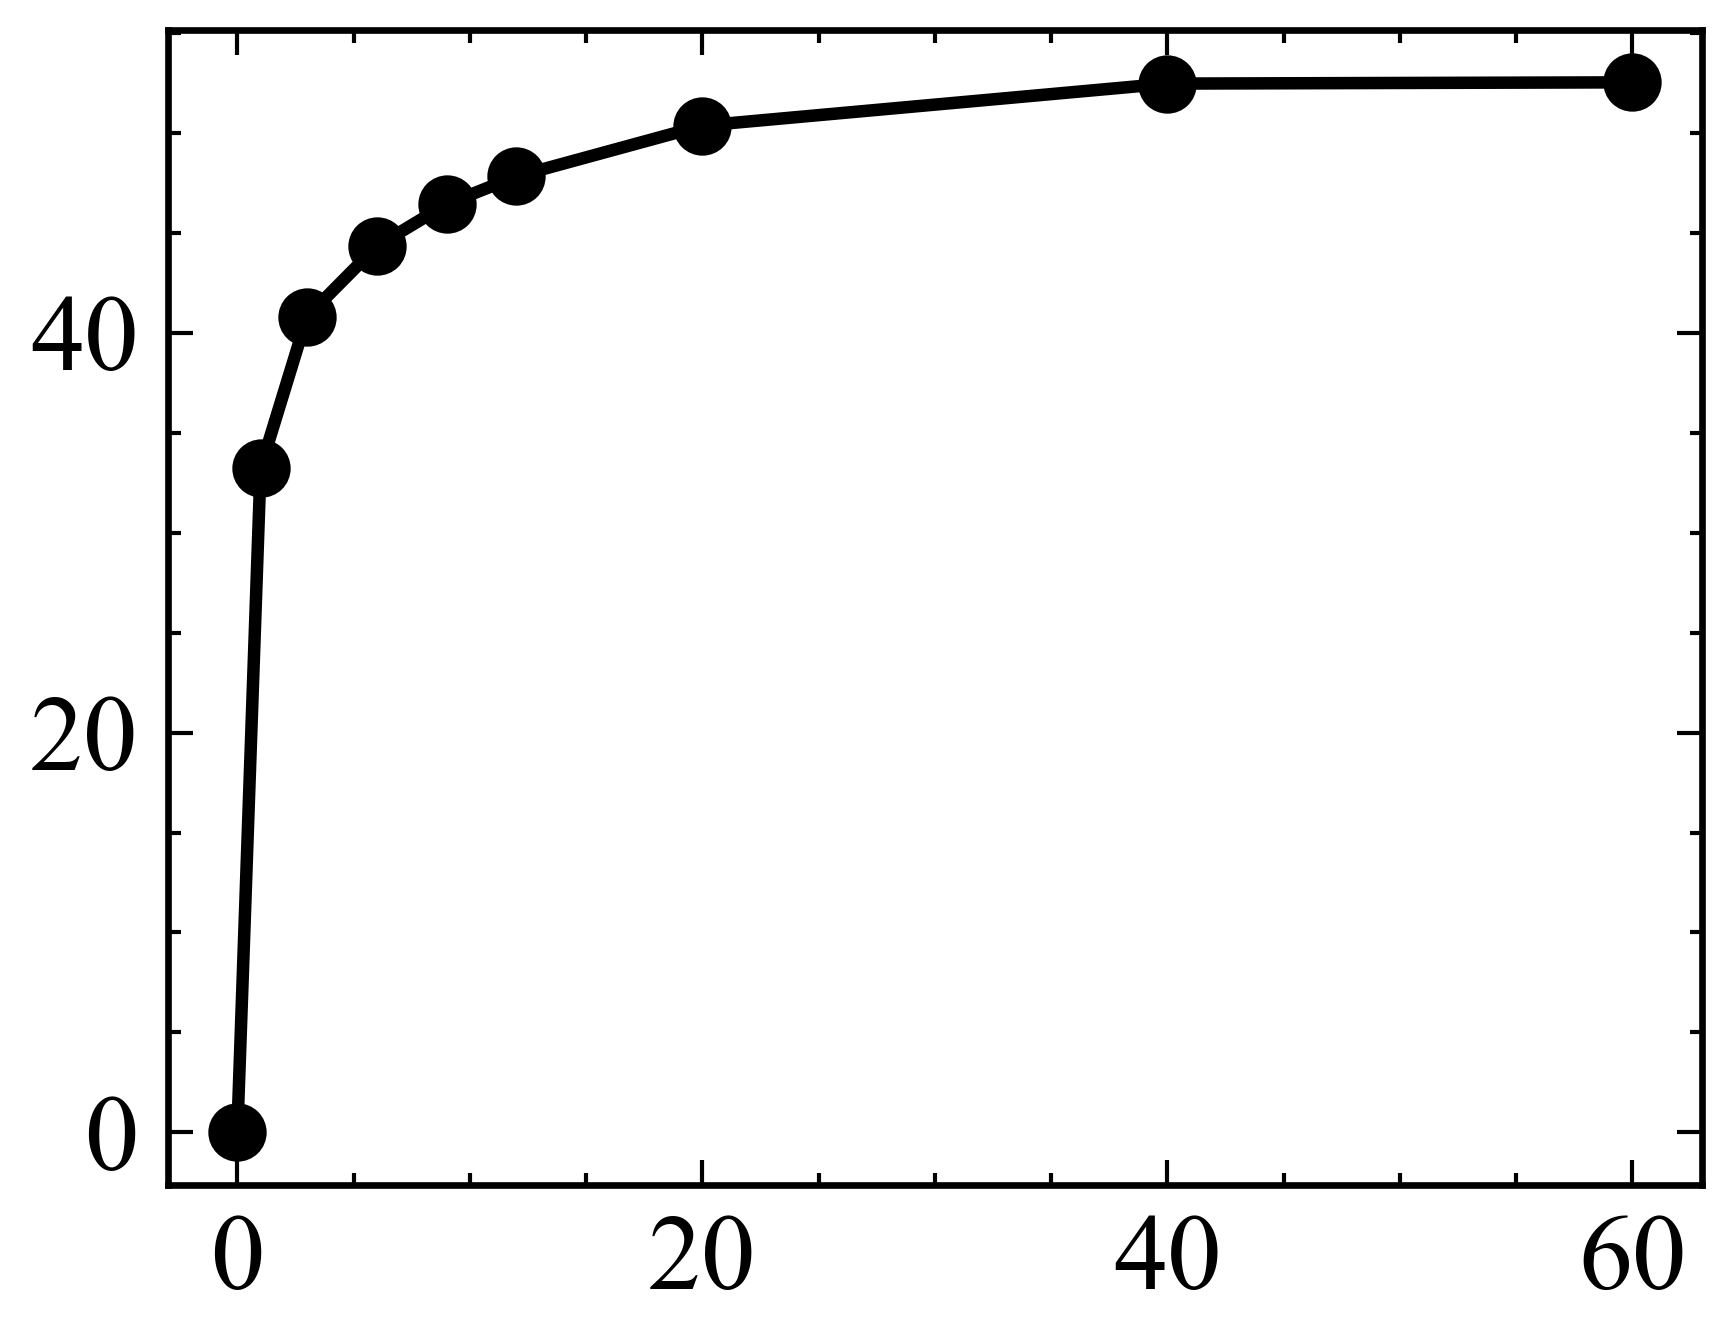

In [33]:
processes = {
    "adsorption": {"e_ads": e_ads, "e_int_abs": e_int_abs},
    "desorption": {"e_des": e_des, "e_int_des": e_int_des},
    "diffusion": {"e_diff": e_diff, "e_int_diff": e_int_diff}
}

T = T
time_array = np.array([0, 1, 3, 6, 9, 12, 20, 40, 60])
lattice_size = lattice_size

# Elegí la red: Square o Hexagonal
lattice = HexagonalLattice(size=lattice_size)  # o HexagonalLattice(size=10)

# Crear y correr el modelo
kmc = KineticMonteCarlo(lattice=lattice, T=T, processes=processes, time_array=time_array)
occupancy = kmc.run_simulation()

# Ver resultados básicos
print("Ocupación final:", occupancy[time_array[-1]])
print("Energía final:", kmc.calculate_total_energy())


simulated_data = occupancy.values()
plt.plot(time_array,simulated_data, marker='o', label='Simulation data')



In [38]:
len(kmc.lattices)

9

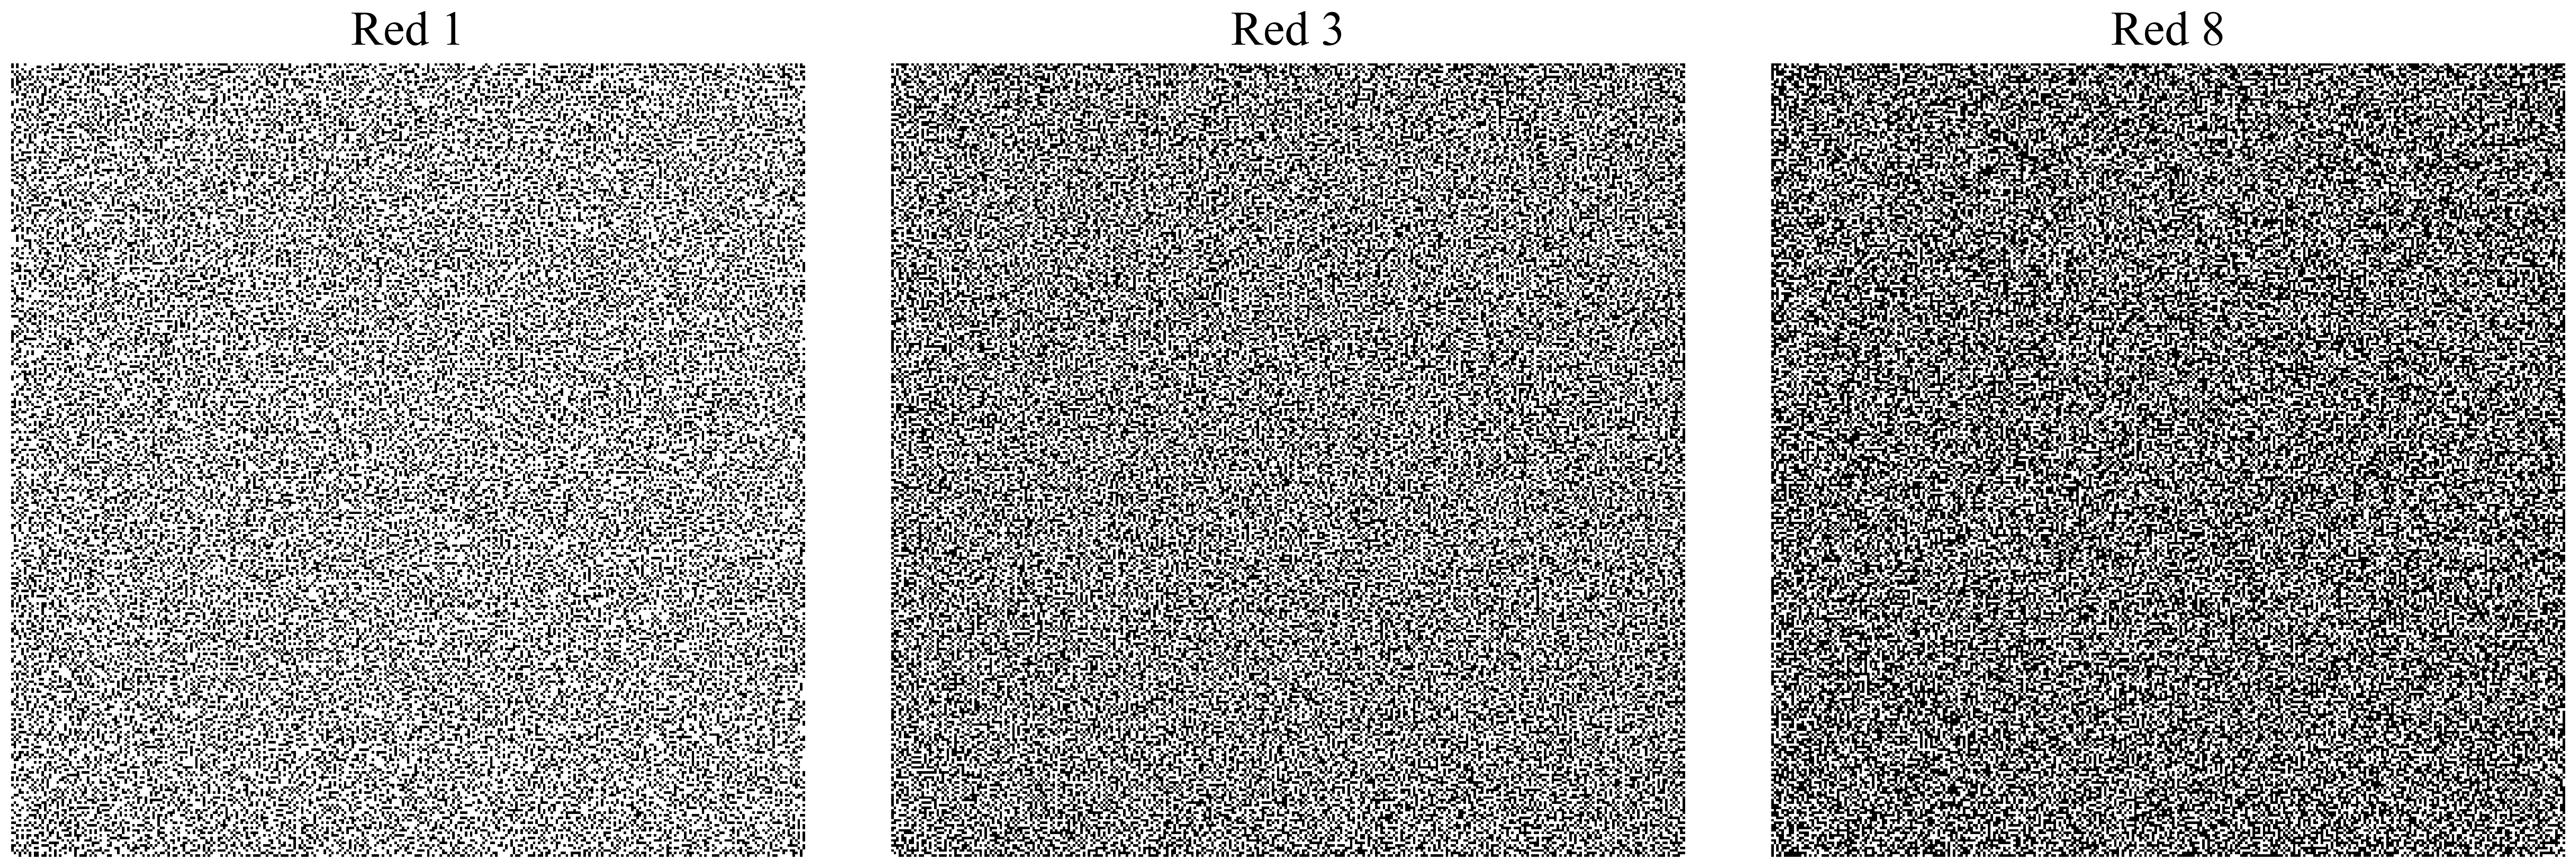

In [43]:


import matplotlib.pyplot as plt

indices = [1, 3, 8]
redes_seleccionadas = [kmc.lattices[i] for i in indices]


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    im = ax.imshow(redes_seleccionadas[i], cmap='Greys', interpolation='none')
    ax.set_title(f'Red {indices[i]}')
    ax.axis('off')  # Opcional, para quitar ejes

plt.tight_layout()
plt.show()


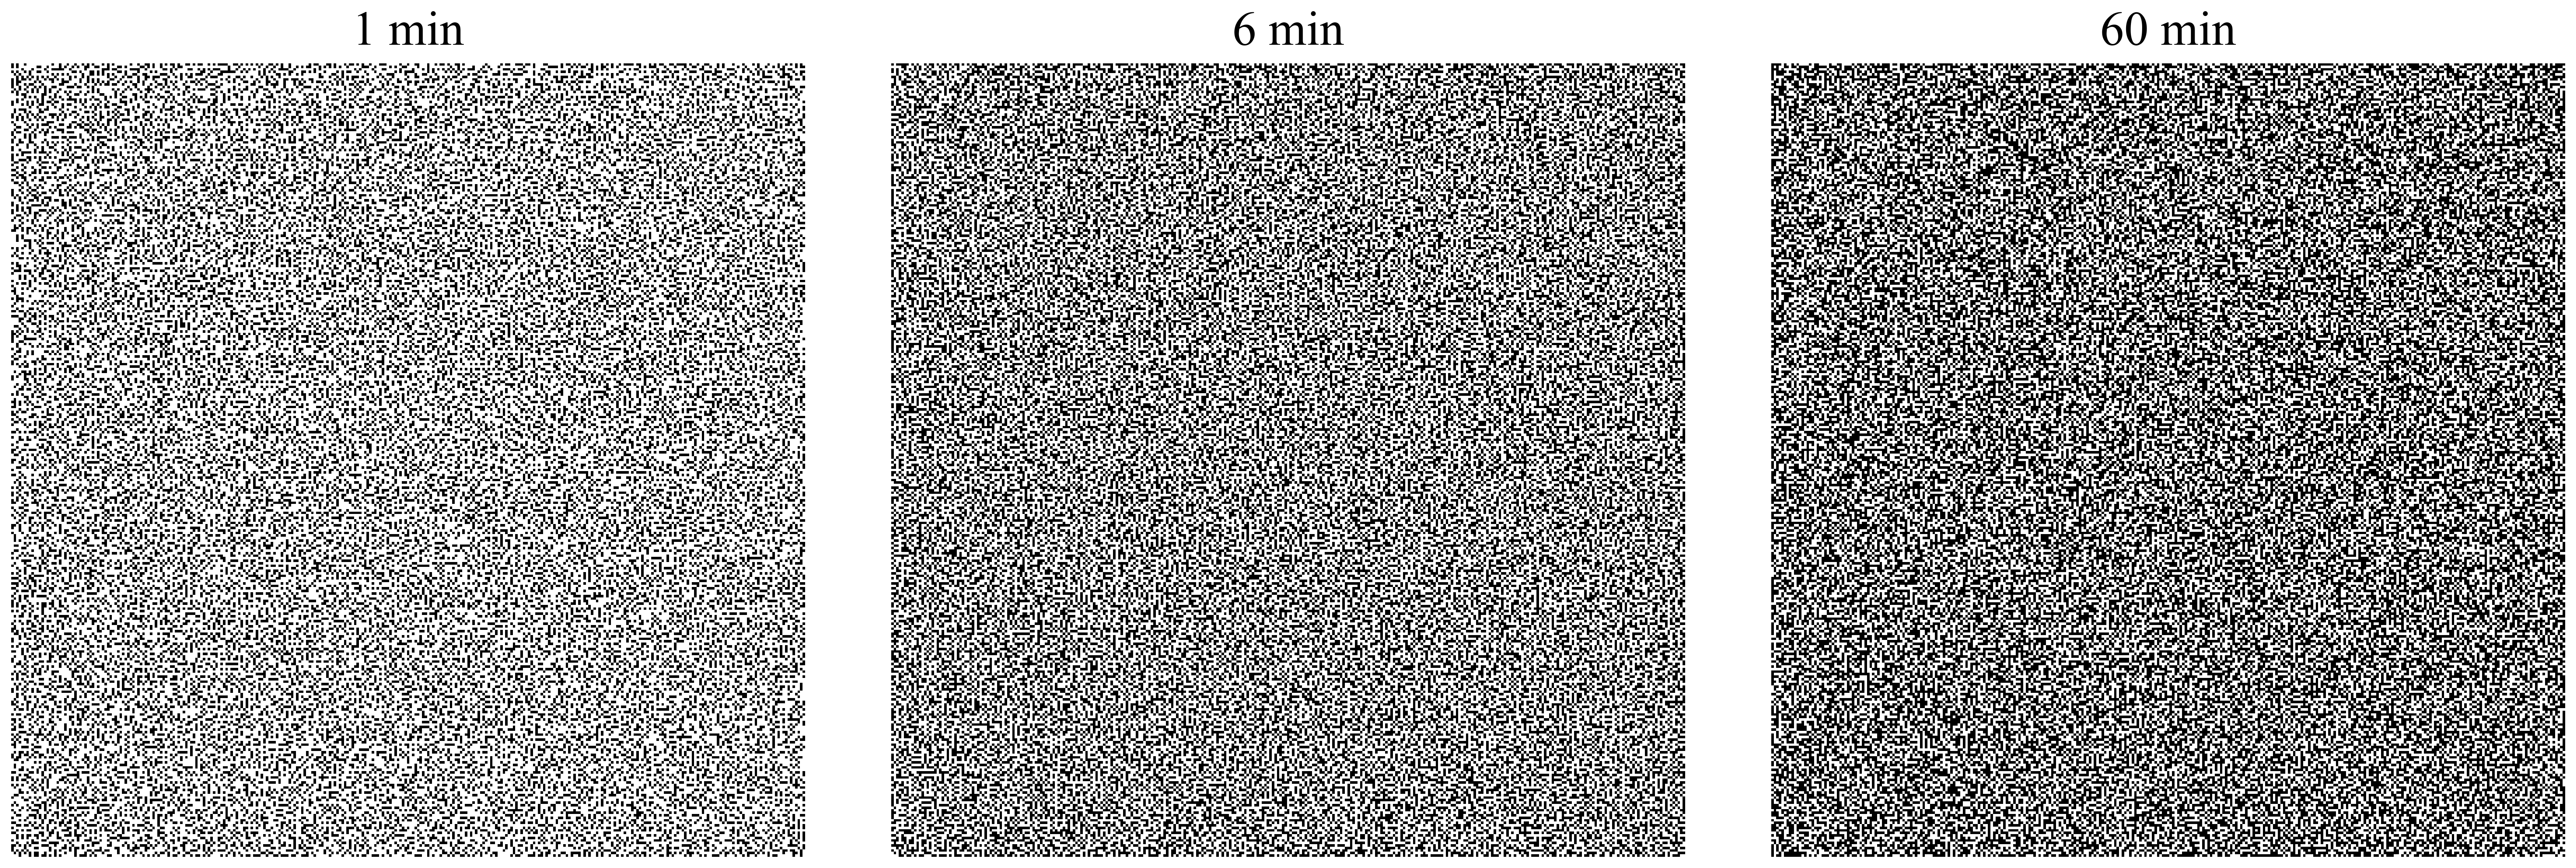

In [48]:
import numpy as np
import matplotlib.pyplot as plt

indices = [1, 3, 8]
time_points = np.array([0, 1, 3, 6, 9, 12, 20, 40, 60])
redes_seleccionadas = [kmc.lattices[i] for i in indices]  # vectorizado

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    im = ax.imshow(redes_seleccionadas[i], cmap='Greys', interpolation='none')
    ax.set_title(f'{time_points[indices[i]]} min')
    ax.axis('off')

plt.tight_layout()
plt.savefig("redes_ocupacion_seleccionadas.png", dpi=300, bbox_inches='tight')
plt.show()
